### Biblioteki używane w rozwiązaniu zadań

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect, newton, fsolve

## Zadanie 1

W zadaniu dla podanych poniżej funkcji próbujemy znaleźć pierwiastek równania $f(x)=0$, czyli miejsce zerowe funkcji za pomocą metody Newtona, startując od podanych punktów początkowych. Zobaczmy, czy sobie ona poradzi.

In [2]:
# Definicje funkcji
def f1(x):
    return x ** 3 - 5 * x

def f2(x):
    return x ** 3 - 3 * x + 1

def f3(x):
    return 2 - x ** 5

def f4(x):
    return x ** 4 - 4.29 * x ** 2 - 5.29

fs = [f1, f2, f3, f4]

In [3]:
# Definicje punktów początkowych
x0_f1 = 1
x0_f2 = 1
x0_f3 = 0.01
x0_f4 = 0.8

x0s = [x0_f1, x0_f2, x0_f3, x0_f4]

Poniżej funkcje pomocnicze do kreślenia wykresów przedstawiających działanie metod iteracyjnych.

In [4]:
def plot_zeroes(zeroes, method):
    x_values = np.linspace(-2.5, 2.5, 400)  

    plt.figure(figsize = (12, 8))

    zero_f1 = zeroes[0]
    zero_f2 = zeroes[1]
    zero_f3 = zeroes[2]
    zero_f4 = zeroes[3]

    # Subplot 1
    plt.subplot(2, 2, 1)
    plt.plot(x_values, f1(x_values), label = r'$f_1(x) = x^3 - 5x$')
    plt.scatter([1], [f1(1)], color = 'red', label = r'$x_0 = 1$')
    plt.scatter([0, -np.sqrt(5), np.sqrt(5)], [0, 0, 0], color = 'black', label = 'Zeroes')  # Plotting zeroes
    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 0.5)  # Add horizontal line at y = 0
    plt.scatter(zero_f1, np.zeros(len(zero_f1)), label = 'Calculated zero', color = 'orange')
    plt.title(r'$f_1$')
    plt.legend()

    # Subplot 2
    plt.subplot(2, 2, 2)
    plt.plot(x_values, f2(x_values), label = r'$f_2(x) = x^3 - 3x + 1$')
    plt.scatter([1], [f2(1)], color = 'red', label = r'$x_0 = 1$')
    zeroes_f2 = np.roots([1, 0, -3, 1])  # Finding zeroes of f2
    plt.scatter(zeroes_f2, [0, 0, 0], color = 'black', label = 'Zeroes')  # Plotting zeroes
    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 0.5)  # Add horizontal line at y = 0
    plt.scatter(zero_f2, np.zeros(len(zero_f2)), label = 'Calculated zero', color = 'orange')
    plt.title(r'$f_2$')
    plt.legend()

    # Subplot 3
    plt.subplot(2, 2, 3)
    plt.plot(x_values, f3(x_values), label = r'$f_3(x) = 2 - x^5$')
    plt.scatter([0.01], [f3(0.01)], color = 'red', label = r'$x_0 = 0.01$')
    plt.scatter([2 ** (0.2)], [0], color = 'black', label = 'Zeroes')  # Plotting zeroes
    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 0.5)  # Add horizontal line at y = 0
    plt.scatter(zero_f3,np.zeros(len(zero_f3)), label = 'Calculated zero', color = 'orange')
    plt.title(r'$f_3$')
    plt.legend()

    # Subplot 4
    plt.subplot(2, 2, 4)
    plt.plot(x_values, f4(x_values), label = r'$f_4(x) = x^4 - 4.29x^2 - 5.29$')
    plt.scatter([0.8], [f4(0.8)], color = 'red', label = r'$x_0 = 0.8$')
    plt.scatter([-2.3, 2.3], [0, 0], color = 'black', label = 'Zeroes')  # Plotting zeroes
    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 0.5)  # Add horizontal line at y = 0
    plt.scatter(zero_f4, np.zeros(len(zero_f4)), label = 'Calculated zero', color = 'orange')
    plt.title(r'$f_4$')
    plt.legend()

    plt.suptitle("Calculated zeroes using " + method, fontsize = 16)  # Adding title to the whole plot

    plt.tight_layout()
    plt.show()

def print_zeroes(zeroes):
    for i in range(len(fs)):
            tmp = [str(el) for el in zeroes[i]]
            print("Zero of f", i + 1, ": " , ", ".join(tmp), sep = "")

Zobaczmy, jak sobie radzi metoda Newtona dla podanych funkcji i punktów początkowych.

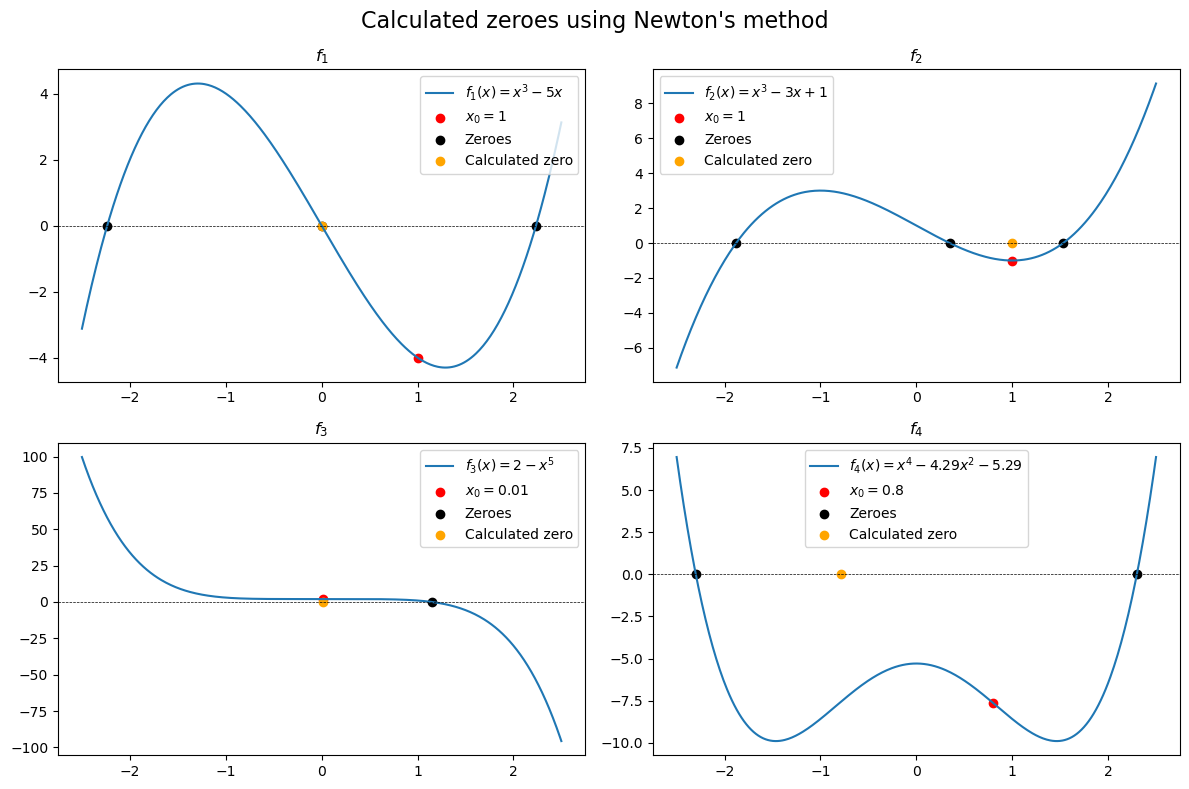

In [5]:
newton_zeroes = [[newton(fs[i], x0s[i])] for i in range(len(fs))]
plot_zeroes(newton_zeroes, "Newton's method")

Jakie dokładnie miejsca zerowe znalazła metoda Newtona?

In [6]:
print_zeroes(newton_zeroes)

Zero of f1: 4.744493466790075e-24
Zero of f2: 1.0000007188230098
Zero of f3: 0.01
Zero of f4: -0.7870232540616441


Poza pierwszym równaniem, metoda Newtona niezbyt dobrze sobie poradziła... Zobaczmy, jak na jej tle wypada metoda bisekcji.

In [7]:
bisect_zeroes = [[bisect(f1, -1, 1)], # dla każdej funkcji dajemy przykładowe przedziały początkowe
                 [bisect(f2, -1, 1)],
                 [bisect(f3, 0, 2)],
                 [bisect(f4, 2, 3)]]

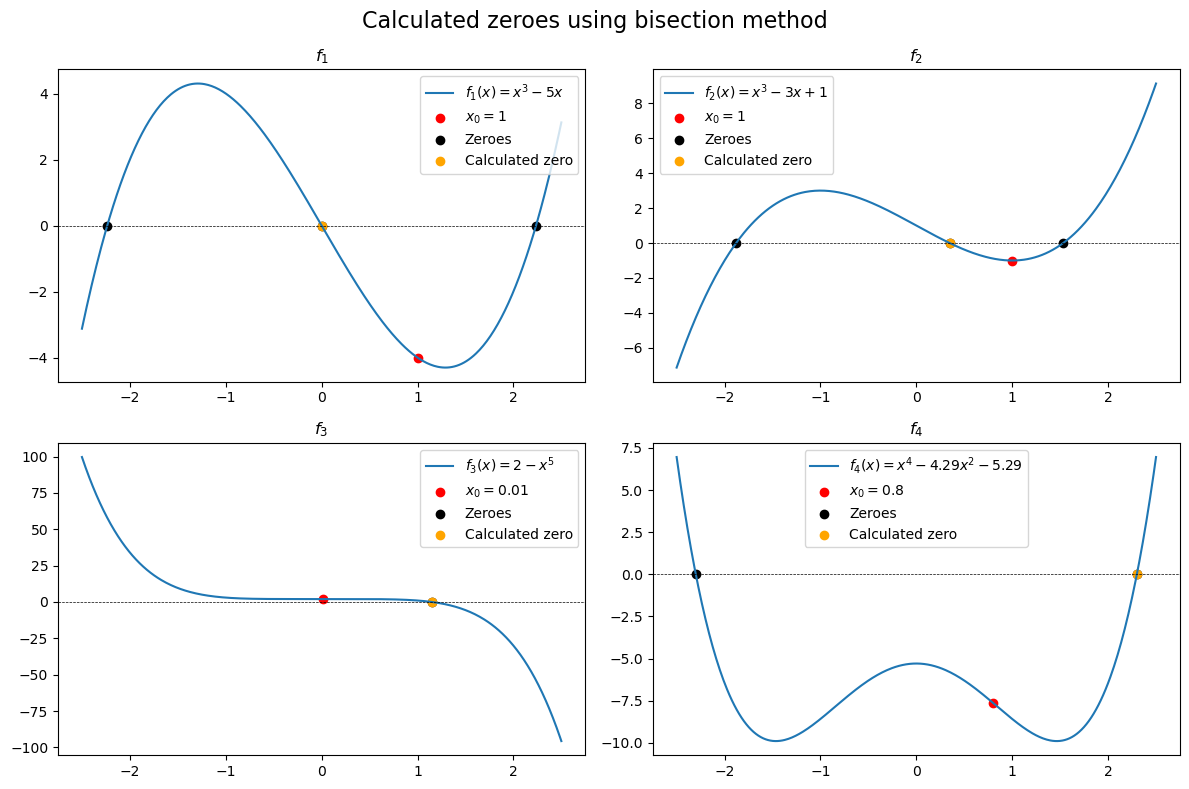

In [8]:
plot_zeroes(bisect_zeroes, "bisection method")

In [9]:
print_zeroes(bisect_zeroes)

Zero of f1: 0.0
Zero of f2: 0.3472963553340378
Zero of f3: 1.148698354996668
Zero of f4: 2.3000000000010914


Widać, że metoda bisekcji poradziła sobie o wiele lepiej, dla każdej z podanych funkcji znalazła jej miejsce zerowe.

## Zadanie 2

W tym zadaniu mamy dane równanie $f(x) = x^2 - 3x + 2 = 0$ oraz równoważne schematy iteracyjne dla tego równania:
$$
    g_1(x) = (x^2 + 2)/3\\
	g_2(x) = \sqrt{3x-2}\\
	g_3(x) = 3-2/x\\
	g_4(x) = (x^2 - 2)/(2x - 3)\\
$$

In [10]:
def f(x):
    return x ** 2 - 3 * x + 2

def g1(x):
    return (x ** 2 + 2) / 3

def g2(x):
    return np.sqrt(3 * x - 2)

def g3(x):
    return 3 - 2 / x

def g4(x):
    return (x ** 2 - 2) / (2 * x - 3)

In [11]:
def iterate_scheme(g, x0, n):
    res = [x0]
    x = x0
    for i in range(n):
        x = g(x)
        res.append(x)
    print([round(el, 3) for el in res])
    return np.array(res)

Zbadamy teraz czy te schematy są zbieżne i jaki jest rząd zbieżności tych schematów. W tym celu wyświetlimy uzyskane wartości dla pierwszych 10 iteracji.

In [12]:
# Wartości pochodnych schematów iteracyjnych w punkcie x = 2
g_1_prim = 4 / 3
g_2_prim = 3 / 5
g_3_prim = 1 / 2
g_4_prim = 0

# Przykładowe punkty startowe
x_1 = x_2 = x_3 = x_4 = 2.8

# Wartości dla pierwszych 10 iteracji
print("Wartości pierwszych 10 iteracji:")

print("Dla schematu g1(x):")
iter_1 = iterate_scheme(g1, x_1, 10)

print("\nDla schematu g2(x):")
iter_2 = iterate_scheme(g2, x_2, 10)

print("\nDla schematu g3(x):")
iter_3 = iterate_scheme(g3, x_3, 10)

print("\nDla schematu g4(x):")
iter_4 = iterate_scheme(g4, x_4, 10)

Wartości pierwszych 10 iteracji:
Dla schematu g1(x):
[2.8, 3.28, 4.253, 6.695, 15.61, 81.887, 2235.814, 1666288.012, 925505246693.746, 2.855199872192172e+23, 2.717388770055398e+46]

Dla schematu g2(x):
[2.8, 2.53, 2.364, 2.257, 2.184, 2.134, 2.098, 2.072, 2.053, 2.04, 2.029]

Dla schematu g3(x):
[2.8, 2.286, 2.125, 2.059, 2.029, 2.014, 2.007, 2.003, 2.002, 2.001, 2.0]

Dla schematu g4(x):
[2.8, 2.246, 2.041, 2.002, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


Zauważmy, że jedynie metoda 1. jest rozbieżna i to tylko dla schematu określonego równaniem $g_1$ wartość pochodnej w punkcie $x=2$ jest większa niż 1. 

---

Poniżej przedstawiamy funkcje pomocnicze do kreślenia wykresów wartości wyrazów ciągów dla każdego schematu.

In [13]:
def plot_iter_points(plt, points):
    n = len(points) - 1
    colors = np.linspace(10 / 11, 1, n)
    x = points[:n]
    y = points[1:]

    plt.scatter(x, y, c = colors, cmap = 'Blues', edgecolor = 'red', linewidths = 0.8, label = 'Iterative series')

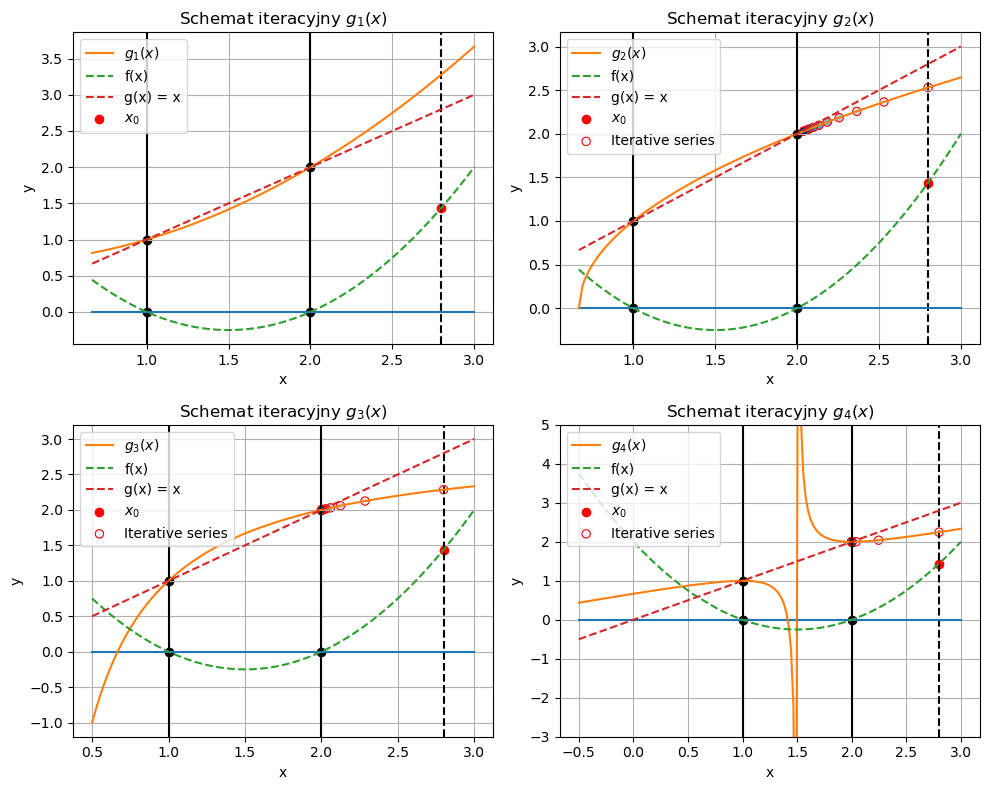

In [14]:
x_values = np.linspace(0, 3, 100)
def g(x): return x

# Wykresy
plt.figure(figsize = (10, 8))

# Wykres 1 - g1(x)
x_values = np.linspace(2 / 3, 3, 100)
plt.subplot(221)
plt.axvline(x = 1, color = 'black')
plt.axvline(x = 2, color = 'black')
plt.axvline(x = x_1, color = 'black', linestyle = '--')
plt.scatter([1, 2, 1, 2], [0, 0, 1, 2], color = 'black')
plt.plot(x_values, np.zeros(len(x_values)))
plt.plot(x_values, g1(x_values), label = r'$g_1(x)$')
plt.plot(x_values, f(x_values), label = 'f(x)', linestyle = '--')
plt.plot(x_values, g(x_values), label = 'g(x) = x', linestyle = '--')
plt.scatter(x_1, f(x_1), color = 'red', label = r'$x_0$')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Schemat iteracyjny $g_1(x)$')
plt.legend()
plt.grid(True)

# Wykres 2 - g2(x)
x_values = np.linspace(2 / 3, 3, 100)
plt.subplot(222)
plt.axvline(x = 1, color = 'black')
plt.axvline(x = 2, color = 'black')
plt.axvline(x = x_2, color = 'black', linestyle = '--')
plt.scatter([1, 2, 1, 2], [0, 0, 1, 2], color = 'black')
plt.plot(x_values, np.zeros(len(x_values)))
plt.plot(x_values, g2(x_values), label = r'$g_2(x)$')
plt.plot(x_values, f(x_values), label = 'f(x)', linestyle = '--')
plt.plot(x_values, g(x_values), label = 'g(x) = x', linestyle = '--')
plt.scatter(x_2, f(x_2), color = 'red', label = r'$x_0$')
plot_iter_points(plt, iter_2)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Schemat iteracyjny $g_2(x)$')
plt.grid(True)
plt.legend()

# Wykres 3 - g3(x)
x_values = np.linspace(1 / 2, 3, 100)
plt.subplot(223)
plt.axvline(x = 1, color = 'black')
plt.axvline(x = 2, color = 'black')
plt.axvline(x = x_3, color = 'black', linestyle = '--')
plt.scatter([1, 2, 1, 2], [0, 0, 1, 2], color = 'black')
plt.plot(x_values, np.zeros(len(x_values)))
plt.plot(x_values, g3(x_values), label = r'$g_3(x)$')
plt.plot(x_values, f(x_values), label = 'f(x)', linestyle = '--')
plt.plot(x_values, g(x_values), label = 'g(x) = x', linestyle = '--')
plt.scatter(x_3, f(x_3), color = 'red', label = r'$x_0$')
plot_iter_points(plt, iter_3)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Schemat iteracyjny $g_3(x)$')
plt.grid(True)
plt.legend()

# Wykres 4 - g4(x)
x_values_1 = np.linspace(-1 / 2, 2 / 3 - 10 ** -1, 100)
x_values_2 = np.linspace(2 / 3 + 10 ** -1, 3, 100)
x_values = np.concatenate([x_values_1, x_values_2])
plt.subplot(224)
plt.axvline(x = 1, color = 'black')
plt.axvline(x = 2, color = 'black')
plt.axvline(x = x_4, color = 'black', linestyle = '--')
plt.ylim((-3, 5))
plt.scatter([1, 2, 1, 2], [0, 0, 1, 2], color = 'black')
plt.plot(x_values, np.zeros(len(x_values)))
plt.plot(x_values, g4(x_values), label = r'$g_4(x)$')
plt.plot(x_values, f(x_values), label = 'f(x)', linestyle = '--')
plt.plot(x_values, g(x_values), label = 'g(x) = x', linestyle = '--')
plt.scatter(x_4, f(x_4), color = 'red', label = r'$x_0$')
plot_iter_points(plt, iter_4)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Schemat iteracyjny $g_4(x)$')
plt.grid(True)
plt.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

Jako że na 1. wykresie praktycznie nie widać żadnej wartości, przyjmijmy dla niego nieco szerszy zakres wartości.

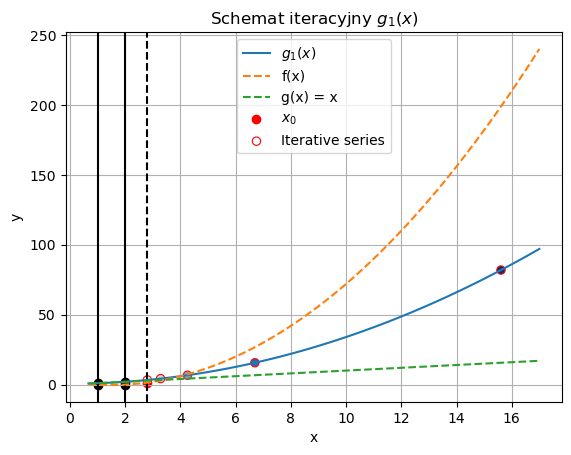

In [15]:
x_values = np.linspace(2 / 3, 17, 100)
plt.axvline(x = 1, color = 'black')
plt.axvline(x = 2, color = 'black')
plt.axvline(x = x_1, color = 'black', linestyle = '--')
plt.scatter([1, 2, 1, 2], [0, 0, 1, 2], color = 'black')
plt.plot(x_values, g1(x_values), label = r'$g_1(x)$')
plt.plot(x_values, f(x_values), label = 'f(x)', linestyle = '--')
plt.plot(x_values, g(x_values), label = 'g(x) = x', linestyle = '--')
plt.scatter(x_1, f(x_1), color = 'red', label = r'$x_0$')
plot_iter_points(plt, iter_1[:6])
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Schemat iteracyjny $g_1(x)$')
plt.legend()
plt.grid(True)

Teraz przejdziemy do badania eksperymentalnego rzędu zbieżności $r$ dla każdej z metod, korzystając ze wzoru $r = \frac{ln\frac{\varepsilon_k}{\varepsilon_{k + 1}}}{ln\frac{\varepsilon_{k-1}}{\varepsilon_k}}$, gdzie $\varepsilon_k$ to błąd bezwględny w k-tej iteracji.

In [16]:
def convergence_order(data):
    res = []
    for i in range(1, len(data) - 1):
        res.append(np.log(data[i] / data[i + 1]) / np.log(data[i - 1] / data[i]))
    return res

Przedstawiamy wyniki poniżej.

In [17]:
x_true = 2

def eps(data, x_true): return np.array([abs(x_true - dat) for dat in data])

eps_g1 = eps(iter_1, 2)
eps_g2 = eps(iter_2, 2)
eps_g3 = eps(iter_3, 2)
eps_g4 = eps(iter_4, 2)

order_g1 = convergence_order(eps_g1)
order_g2 = convergence_order(eps_g2)
order_g3 = convergence_order(eps_g3)
order_g4 = convergence_order(eps_g4)

print("Dla schematu g1(x):")
# print("Błędy bezwzględne:", eps_g1)
print("Rzędy zbieżności:", order_g1)

print("\nDla schematu g2(x):")
# print("Błędy bezwzględne:", eps_g2)
print("Rzędy zbieżności:", order_g2)

print("\nDla schematu g3(x):")
# print("Błędy bezwzględne:", eps_g3)
print("Rzędy zbieżności:", order_g3)

print("\nDla schematu g4(x):")
# print("Błędy bezwzględne:", eps_g4)
print("Rzędy zbieżności:", order_g4)

Dla schematu g1(x):
Rzędy zbieżności: [1.2027860507317343, 1.2991316734191554, 1.4490213151140374, 1.6630862556477026, 1.8820166895617867, 1.9858689132353582, 1.999729893493616, 1.9999998185188848, 1.9999999999998368]

Dla schematu g2(x):
Rzędy zbieżności: [0.9096111265205871, 0.933446049047978, 0.9508059879236328, 0.963518465830544, 0.9728744319458565, 0.9797892754349563, 0.9849173546853511, 0.98873054819397, 0.9915718805716454]

Dla schematu g3(x):
Rzędy zbieżności: [0.8028972253142889, 0.911807595874612, 0.9580282986927271, 0.9795011906726845, 0.9898674678902567, 0.9949623746372681, 0.9974882772644582, 0.9987459024585197, 0.999373391109907]

Dla schematu g4(x):
Rzędy zbieżności: [1.5289650167836226, 1.821184614681913, 1.9771384204270377, 1.9995228231282003, inf, nan, nan, nan, nan]


C:\Users\Wojciech\AppData\Local\Temp\ipykernel_20868\4140091896.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  res.append(np.log(data[i] / data[i + 1]) / np.log(data[i - 1] / data[i]))
C:\Users\Wojciech\AppData\Local\Temp\ipykernel_20868\4140091896.py:4: RuntimeWarning: invalid value encountered in scalar divide
  res.append(np.log(data[i] / data[i + 1]) / np.log(data[i - 1] / data[i]))


Teraz przechodzimy do obliczenia błędu względnego.

In [18]:
def relative_err(val, true_val = 2):
    return np.abs(val - true_val) / true_val

In [19]:
relative_1 = relative_err(iter_1)
relative_2 = relative_err(iter_2)
relative_3 = relative_err(iter_3)
relative_4 = relative_err(iter_4)

Przykładowo wartości dla schematu iteracyjnego nr 2:

In [20]:
relative_2

array([0.4       , 0.26491106, 0.18210262, 0.12834123, 0.0920219 ,
       0.06678623, 0.04889434, 0.03602197, 0.02666107, 0.01979979,
       0.01474119])

Poniżej na wspólnym wykresie najpierw przedstawiamy błędy względne wszystkich metod, później tylko zbieżnych - czyli wszystkich oprócz 1.

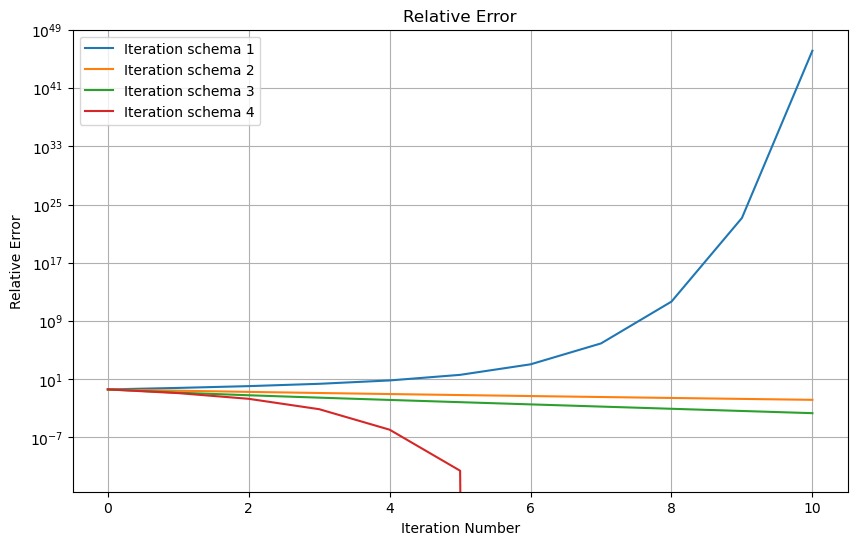

In [21]:
plt.figure(figsize = (10, 6))

xs = range(0, 11)

plt.semilogy(xs, relative_1, label = 'Iteration schema 1')
plt.semilogy(xs, relative_2, label = 'Iteration schema 2')
plt.semilogy(xs, relative_3, label = 'Iteration schema 3')
plt.semilogy(xs, relative_4, label = 'Iteration schema 4')

plt.xlabel('Iteration Number')
plt.ylabel('Relative Error')
plt.title('Relative Error')
plt.legend()
plt.grid(True)
plt.show()

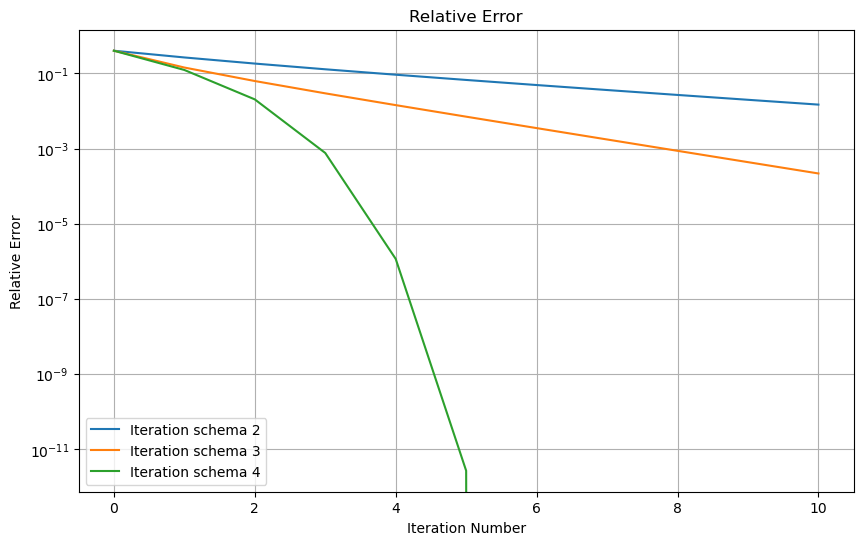

In [22]:
plt.figure(figsize = (10, 6))

plt.semilogy(xs, relative_2, label = 'Iteration schema 2')
plt.semilogy(xs, relative_3, label = 'Iteration schema 3')
plt.semilogy(xs, relative_4, label = 'Iteration schema 4')

plt.xlabel('Iteration Number')
plt.ylabel('Relative Error')
plt.title('Relative Error')
plt.legend()
plt.grid(True)
plt.show()

## Zadanie 3

Mamy dane równania nieliniowe:
- (a) $x^3-2x-5=0$ 
- (b) $e^{-x}=x$
- (c) $xsin(x)=1$

Poniżej zapisujemy te równania w postaci funkcji w taki sposób, że równoważnie zajmujemy się znalezieniem pierwiastka równania $f(x)=0$ dla każdego z trzech równań.

In [23]:
# Podane równania nieliniowe zapisane jako funkcje, których pierwiastków szukamy
def r1(x):
    return x ** 3 - 2 * x - 5

def r2(x):
    return np.exp(-x) - x

def r3(x):
    return x * np.sin(x) - 1

W metodzie Newtona schemat iteracyjny bazuje na pochodnej funkcji. Zapiszmy pochodne powyższych funkcji.

In [24]:
def d1(x):
    return 3 * x ** 2 - 2

def d2(x):
    return -np.exp(-x) - 1

def d3(x):
    return np.sin(x) + x * np.cos(x)

Celem jest użycie metody Newtona i zbadanie, ile iteracji należy wykonać, aby osiągnąć:
- 24-bitową dokładność,
- 53-bitową dokładność,

wiedząc, że $x_0$ jest przybliżeniem pierwiastka z dokładnością do 4 bitów.

---

Poniżej do znalezienia dokładnych rozwiązań używamy funkcji `fsolve` z biblioteki **scipy**. Wartości początkowe szacujemy, patrząc na wykres funkcji (skorzystaliśmy z programu [Geogebra Wykresy](https://www.geogebra.org/graphing)) - w tym przypadku takie oszacowanie wystarczy.

In [25]:
x01_sol = fsolve(r1, 2.1)[0]  # 2.1  is estimated, initial guess
x02_sol = fsolve(r2, 0.55)[0] # 0.55 is estimated, initial guess
x03_sol = fsolve(r3, 1.1)[0]  # 1.1  is estimated, initial guess

Poniżej znajdują się pomocnicze funkcje do przekształcania liczby zmiennoprzecinkowej na reprezentację binarną i vice-versa, zachowując wybraną liczbę bitów w części ułamkowej (w naszym przypadku 4 bity). Kod jest inspirowany kodem ze źródła: [program do konwersji](https://www.geeksforgeeks.org/python-program-to-convert-floating-to-binary/) - główne różnice to usunięcie komentarzy, dodanie konwersji w drugą stronę i obsługa zer na początku części ułamkowej.

In [26]:
def float_bin(number, places = 4): # konwersja z floata na zapis binarny 
    whole, dec = str(number).split(".")
    leading_zeros = calc_leading_zeros(dec) # obsłużenie wiodących zer
    
    whole = int(whole)
    dec = int(dec)
    res = bin(whole).lstrip("0b") + "."
    
    for x in range(places):
        converted = str(decimal_converter(dec) * 2)
        
        if leading_zeros > 0:
            converted = ''.join(str(converted).split("."))
            
            if converted[0] == '0':
                converted = '0.' + leading_zeros * '0' + converted[1:]
            else:
                converted = '0.' + (leading_zeros - 1) * '0' + '1' + converted[1:]
        
        whole, dec = converted.split(".")
        leading_zeros = calc_leading_zeros(dec)
        dec = int(dec)
        res += whole
 
    return res

def calc_leading_zeros(num): # funkcja do wyznaczania liczby zer wiodących
    leading_zeros = 0
    for c in num:
        if c == '0':
            leading_zeros += 1
        else: break
    return leading_zeros

def decimal_converter(num): # zamiana liczby na część ułamkową
    while num > 1:
        num /= 10
    return num

def bin_float(number): # konwersja z zapisu binarnego na floata
    whole, dec = number.split(".")
    whole = whole[::-1]
    
    res = 0.
    for i in range(len(whole)):
        res += int(whole[i]) * 2 ** i
        
    for i in range(len(dec)):
        res += int(dec[i]) * 2 ** (-i - 1)
 
    return res

In [27]:
# Rozwiązania zapisane z dokładnością do 4 bitów po przecinku
est_x01 = bin_float(float_bin(x01_sol))
est_x02 = bin_float(float_bin(x02_sol))
est_x03 = bin_float(float_bin(x03_sol))

print("Dokładne wartości pierwiastków:", x01_sol, x02_sol, x03_sol, sep = '\n')
print("\nWartości z dokładnością 4 bitów:", est_x01, est_x02, est_x03, sep = '\n')

Dokładne wartości pierwiastków:
2.0945514815423265
0.567143290409784
1.1141571408719293

Wartości z dokładnością 4 bitów:
2.0625
0.5625
1.0625


Zgodnie z teorią, metoda Newtona ma zbieżność kwadratową, co powinno powodować zwiększanie się liczby cyfr, które są dokładnie wyznaczone dwukrotnie z każdą iteracją. Sprawdźmy, jak to wygląda w praktyce. Najpierw zbadamy liczbę iteracji potrzebną do uzyskania 24 bitowej dokładności. Gdyby coś poszło nie tak, dajemy "bezpiecznik" 1000 iteracji limitu - chociaż powinno ich być oczywiście dużo mniej.

In [28]:
def calc_no_iters(start, fun, der, limit_exact, sol, flag = False, limit_iters = 1000):
    no_iters = 1
    prev_iter = start
    curr_iter = prev_iter - fun(prev_iter) / der(prev_iter)
    exact = check_exact_bits(sol, curr_iter)
    
    if flag: 
        print("W iteracji nr", no_iters, "bity zgadzają się na", exact, "pozycjach.")

    while exact < limit_exact and no_iters <= limit_iters:
        prev_iter = curr_iter
        curr_iter = prev_iter - fun(prev_iter) / der(prev_iter)
        exact = check_exact_bits(sol, curr_iter)
        no_iters += 1
        
        if flag: 
            print("W iteracji nr", no_iters, "bity zgadzają się na", exact, "pozycjach.")
        if no_iters >= 10: flag = False
        
    return no_iters

def check_exact_bits(real_val, estimation):
    bin_real = float_bin(real_val, 53)
    bin_est  = float_bin(estimation, 53)
    
    exact = 0
    real_bits = bin_real.split('.')[1]
    est_bits  = bin_est.split('.')[1]
    
    for i in range(53):
        if real_bits[i] == est_bits[i]:
            exact += 1
        else: break
    
    return exact

In [29]:
no_iters1 = calc_no_iters(est_x01, r1, d1, 24, x01_sol)
no_iters2 = calc_no_iters(est_x02, r2, d2, 24, x02_sol)
no_iters3 = calc_no_iters(est_x03, r3, d3, 24, x03_sol)

In [30]:
print(no_iters1, no_iters2, no_iters3)

3 2 2


Teraz przeprowadźmy podobne testy, ale dla zbadania 53-bitowej dokładności (taką jesteśmy maksymalnie w stanie uzyskać, korzystając z typu *float64*).

In [31]:
no_iters1 = calc_no_iters(est_x01, r1, d1, 53, x01_sol)
no_iters2 = calc_no_iters(est_x02, r2, d2, 53, x02_sol)
no_iters3 = calc_no_iters(est_x03, r3, d3, 53, x03_sol)

In [32]:
print(no_iters1, no_iters2, no_iters3)

4 1001 1001


Jak widać, dla 2. i 3. równania osiągnięto limit iteracji. Spróbujmy sprawdzić, jak zmienia się liczba dokładnie wyznaczonych cyfr wraz z każdą iteracją. Przykładowo, rozpiszemy maksymalnie 10 iteracji.

In [33]:
print("Dokładność wyniku w początkowych iteracjach dla 1. równania:")
calc_no_iters(est_x01, r1, d1, 53, x01_sol, True)

print("\nDokładność wyniku w początkowych iteracjach dla 2. równania:")
calc_no_iters(est_x02, r2, d2, 53, x02_sol, True)

print("\nDokładność wyniku w początkowych iteracjach dla 3. równania:")
calc_no_iters(est_x03, r3, d3, 53, x03_sol, True)

print()

Dokładność wyniku w początkowych iteracjach dla 1. równania:
W iteracji nr 1 bity zgadzają się na 9 pozycjach.
W iteracji nr 2 bity zgadzają się na 20 pozycjach.
W iteracji nr 3 bity zgadzają się na 41 pozycjach.
W iteracji nr 4 bity zgadzają się na 53 pozycjach.

Dokładność wyniku w początkowych iteracjach dla 2. równania:
W iteracji nr 1 bity zgadzają się na 17 pozycjach.
W iteracji nr 2 bity zgadzają się na 37 pozycjach.
W iteracji nr 3 bity zgadzają się na 49 pozycjach.
W iteracji nr 4 bity zgadzają się na 49 pozycjach.
W iteracji nr 5 bity zgadzają się na 49 pozycjach.
W iteracji nr 6 bity zgadzają się na 49 pozycjach.
W iteracji nr 7 bity zgadzają się na 49 pozycjach.
W iteracji nr 8 bity zgadzają się na 49 pozycjach.
W iteracji nr 9 bity zgadzają się na 49 pozycjach.
W iteracji nr 10 bity zgadzają się na 49 pozycjach.

Dokładność wyniku w początkowych iteracjach dla 3. równania:
W iteracji nr 1 bity zgadzają się na 15 pozycjach.
W iteracji nr 2 bity zgadzają się na 37 pozycjach.

Jak widać, dla równania 2. jesteśmy w stanie maksymalnie osiągnąć dokładność 49 bitów, a dla 3. równania maksymalnie 48 bitów.

## Zadanie 4

W tym zadaniu celem jest napisanie schematu iteracji według metody Newtona dla układu równań nieliniowych:
$$
    x_1^2+x_2^2=1 \\
    x_1^2-x_2=0
$$
Błąd względny rozwiązania znajdujemy wiedząc, że dokładne rozwiązanie tego układu to
$$
    x_1=\pm \sqrt{\frac{\sqrt{5}}{2}-\frac{1}{2}}, x_2=\frac{\sqrt{5}}{2}-\frac{1}{2}.
$$

In [34]:
# Rzeczywiste pierwiastki układu
real_x11 = np.sqrt((np.sqrt(5) - 1) / 2)
real_x12 = -real_x11
real_x2  = (np.sqrt(5) - 1) / 2

Poniżej zapisujemy układ równań w postaci funkcji wielu zmiennych.

In [35]:
def F(x): # x to wektor dwóch elementów
    x1, x2 = x[0], x[1]
    return np.array([x1 ** 2 + x2 ** 2 - 1, x1 ** 2 - x2]) # zwracamy wektor dwóch elementów

def F_prim(x): # pochodna funkcji F
    x1, x2 = x[0], x[1]
    return np.array([[2 * x1, 2 * x2],
                    [2 * x1, -1.0]]) # macierz Jakobiego

W przypadku wielu zmiennych przy obliczaniu pochodnej mamy do czynienia nie z liczbą, tylko z tzw. macierzą Jakobiego. Wzór iteracyjny Newtona przybiera analogiczną postać:
$$
    x_{k+1}=x_k-(F'(x_k))^{-1}F(x_k).
$$

Poniżej arbitralnie wybieramy jako punkt startowy wektor zerowy $\textbf{x}_0=[1,1]$ oraz jako warunek STOP-u 10 iteracji. Zobaczymy, jaką dokładność uda się osiągnąć.

In [36]:
x0 = np.array([1., 1.])
prev_iter = x0
curr_iter = prev_iter - np.linalg.inv(F_prim(prev_iter)) @ F(prev_iter) # bierzemy tzw. pochodną Frecheta
no_iter = 1

while no_iter < 10:
    prev_iter = curr_iter
    curr_iter = prev_iter - np.linalg.inv(F_prim(prev_iter)) @ F(prev_iter)
    no_iter += 1

In [37]:
print("calculated x1:", curr_iter[0], "\tcalculated x2:", curr_iter[1])
print("real x1:    +/-", real_x11, "\treal x2:       ", real_x2, sep = '')

calculated x1: 0.7861513777574233 	calculated x2: 0.6180339887498948
real x1:    +/-0.7861513777574233	real x2:       0.6180339887498949


Jak można zauważyć, metoda Newtona dla pierwszego pierwiastka znalazła rozwiązanie dokładne z dokładnością do 16 cyfr po przecinku (biorąc pod uwagę wartość tego pierwiastka z plusem, bowiem alternatywne rozwiązanie jest liczbą przeciwną). Dla drugiego pierwiastka różnica występuje dopiero na 16. cyfrze po przecinku, więc błąd jest tego rzędu, a wykonaliśmy jedynie 10 iteracji.

---

Zobaczmy, ile dokładnie wynoszą błędy (należy wziąć pod uwagę reprezentację zmiennoprzecinkową i jej dokładność).

In [38]:
print("Błąd bezwzględny 1. pierwiastka:", np.abs(curr_iter[0] - real_x11))
print("Błąd bezwzględny 2. pierwiastka:", np.abs(curr_iter[1] - real_x2))

Błąd bezwzględny 1. pierwiastka: 0.0
Błąd bezwzględny 2. pierwiastka: 1.1102230246251565e-16


Teraz obliczmy błędy względne.

In [39]:
print("Błąd względny 1. pierwiastka:", relative_err(curr_iter[0], real_x11))
print("Błąd względny 2. pierwiastka:", relative_err(curr_iter[1], real_x2))

Błąd względny 1. pierwiastka: 0.0
Błąd względny 2. pierwiastka: 1.7963785889362146e-16
